Model $M$ specifies that the coin lands heads in a single toss with probability $p$, that all tosses are independent, and that $p$ is constant. The appropriate likelihood is the binomial distribution:


\begin{equation}
P(r | p, n, M) \,=\, \left(\!\!\!
   \begin{array}{c}
    n \\
    r
  \end{array} \!\!\!\right)  \, p^r(1-p)^{n-r}
\end{equation}

With a uniform prior ${\cal U}(0,1)$ over $p$ the posterior PDF is just proportional to the likelihood
\begin{equation}
P(p | r,n,M) \,=\, \frac{1}{Z} \, p^r(1-p)^{n-r} 
\end{equation}
The following code plots this for fixed $n$ for various $r$. The vertical dashed line is the mean.

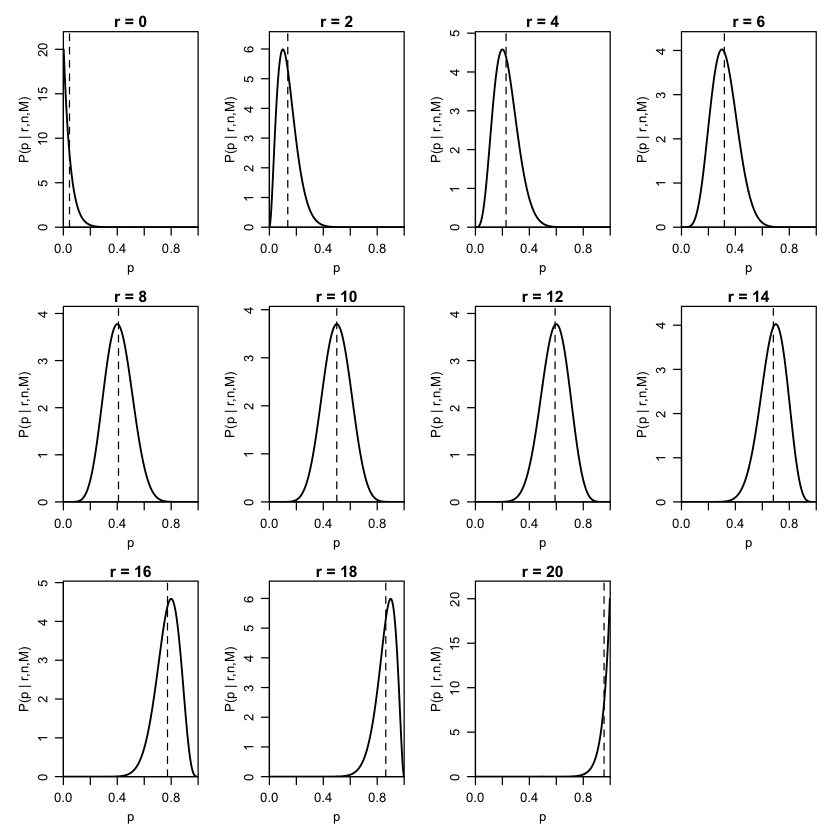

In [1]:
##### Compute the posterior PDF for coin problem with a uniform prior for a
##### range of r

n <- 20
Nsamp <- 200 # no. of points to sample at
#pdf("coin1.pdf", 9, 7)
par(mfrow=c(3,4), mgp=c(2,0.8,0), mar=c(3.5,3.5,1.5,1), oma=0.5*c(1,1,1,1))
deltap <- 1/Nsamp # width of rectangles used for numerical integration
p <- seq(from=1/(2*Nsamp), by=1/Nsamp, length.out=Nsamp) # rectangle centres
for(r in seq(from=0, to=20, by=2)) {
  pdense <- dbinom(x=r, size=n, prob=p)
  pdense <- pdense/(deltap*sum(pdense)) # normalize posterior
  plot(p, pdense, type="l", lwd=1.5, xlim=c(0,1), ylim=c(0,1.1*max(pdense)), 
       xaxs="i", yaxs="i", xlab="p", ylab="P(p | r,n,M)")
  title(main=paste("r =",r), line=0.3, cex.main=1.2)
  p.mean <- deltap*sum(p*pdense)
  abline(v=p.mean, lty=2)
}
#dev.off()

We could instead use a beta distribution as a prior, which is characterized by two parameters $\alpha$ and $\beta$.
\begin{equation}
P(p) \,=\, \frac{1}{B(\alpha,\beta)} \, p^{\alpha - 1}(1-p)^{\beta -1} 
\end{equation}

where $\alpha>0$, $\beta>0$, $0 \leq p \leq 1$.

Multiplying this prior by the likelihood, and absorbing terms independent of $p$ into the normalization constant $Z$, gives the posterior
\begin{alignat}{2}
P(p | r,n,M) \,&=\, \frac{1}{Z} \, p^r(1-p)^{n-r} \, p^{\alpha - 1}(1-p)^{\beta -1} \nonumber \\
              &=\, \frac{1}{Z} \, p^{r + \alpha - 1}(1-p)^{n - r + \beta -1} \ .
\end{alignat}
The following code plots this (they grey line is the posterior with the uniform distribution, for comparison).

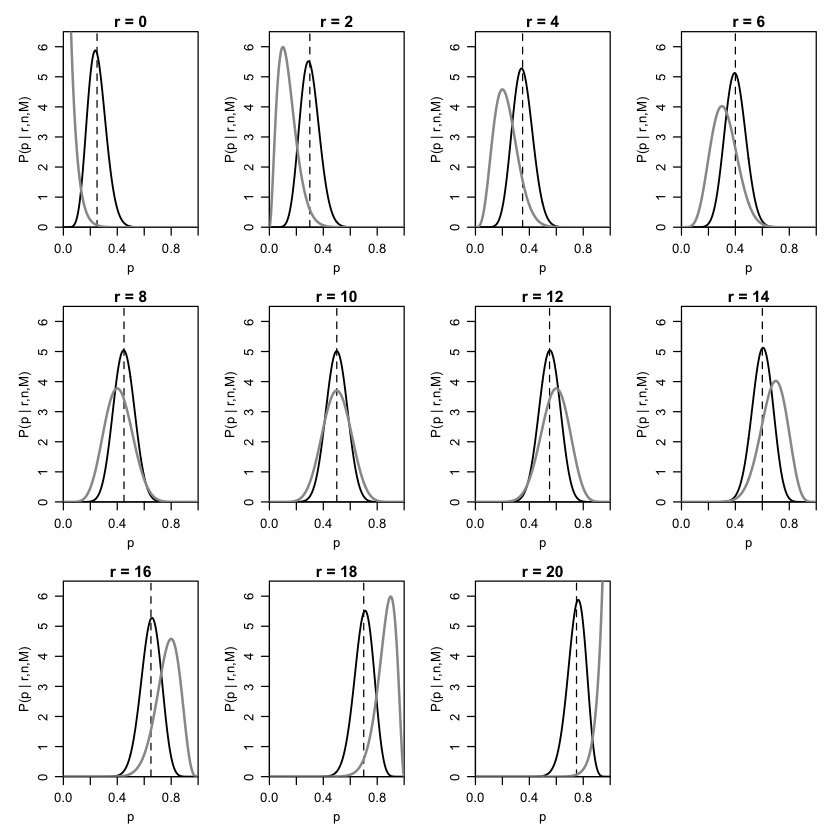

In [7]:
##### Compute posterior PDF for coin problem with a beta prior for a
##### range of r

n <- 20
alpha.prior <- 10
beta.prior  <- 10
Nsamp <- 200 # no. of points to sample at
#pdf("coin2.pdf", 9, 7)
par(mfrow=c(3,4), mgp=c(2,0.8,0), mar=c(3.5,3.5,1.5,1), oma=0.5*c(1,1,1,1))
deltap <- 1/Nsamp # width of rectangles used for numerical integration
p <- seq(from=1/(2*Nsamp), by=1/Nsamp, length.out=Nsamp) # rectangle centres
for(r in seq(from=0, to=20, by=2)) {
  pdense <- dbeta(x=p, shape1=alpha.prior+r, shape2=beta.prior+n-r)
  plot(p, pdense, type="l", lwd=1.5, xlim=c(0,1), ylim=c(0, 6.5), 
       xaxs="i", yaxs="i", xlab="p", ylab="P(p | r,n,M)")
  title(main=paste("r =",r), line=0.3, cex.main=1.2)
  p.mean <- deltap*sum(p*pdense)
  abline(v=p.mean, lty=2)
  # overplot posterior obtained from a uniform prior
  pdense.uniform <- dbinom(x=r, size=n, prob=p)
  lines(p, pdense.uniform/(deltap*sum(pdense.uniform)), lwd=2, 
        col="grey60")
  # Can verify that pdense can also be found by direct calculation
  #pdense2 <- dbinom(x=r, size=n, prob=p) * 
  #           dbeta(x=p, shape1=alpha.prior, shape2=beta.prior)
  #pdense2 <- pdense2/(deltap*sum(pdense2)) # normalize posterior
  #lines(p, pdense2, col="red", lty=2)
}
#dev.off()

It is instructive to plot the likelihood, prior, and posterior together, which is done by the following code. Dashed=prior, dotted=likelihood, solid=posterior.

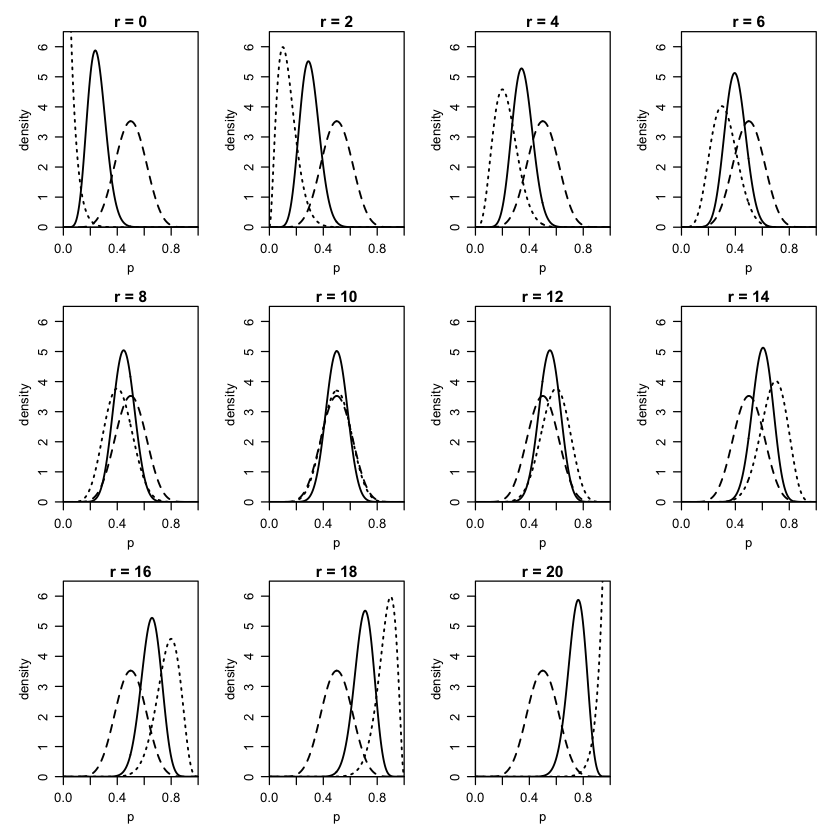

In [8]:
##### Plot prior, likelihood, and posterior PDF for coin problem with a
##### beta prior for a range of r with n fixed

n <- 20
alpha.prior <- 10
beta.prior  <- 10
Nsamp <- 200 # no. of points to sample at
#pdf("coin3.pdf", 9, 7)
par(mfrow=c(3,4), mgp=c(2,0.8,0), mar=c(3.5,3.5,1.5,1), oma=0.5*c(1,1,1,1))
deltap <- 1/Nsamp # width of rectangles used for numerical integration
p <- seq(from=1/(2*Nsamp), by=1/Nsamp, length.out=Nsamp) # rectangle centres
prior <- dbeta(x=p, shape1=alpha.prior, shape2=beta.prior)
for(r in seq(from=0, to=20, by=2)) {
  like  <- dbinom(x=r, size=n, prob=p)
  like  <- like/(deltap*sum(like)) # for plotting convenience only
  post  <- dbeta(x=p, shape1=alpha.prior+r, shape2=beta.prior+n-r)
  plot(p, prior, type="l", lwd=1.5, lty=2, xlim=c(0,1), ylim=c(0, 6.5),
       xaxs="i", yaxs="i", xlab="p", ylab="density")
  lines(p, like, lwd=1.5, lty=3)
  lines(p, post, lwd=1.5)
  title(main=paste("r =",r), line=0.3, cex.main=1.2)
}
#dev.off()

As we get more and more (useful) data, the prior stays the same, but the likelihood becomes more peaked, so the posterior will be influenced more by the likelihood than by the prior. I demonstrate this using the same prior as above, a beta distribution with $\alpha\!=\!\beta\!=\!10$. Let's start with $(r,n)\!=\!(2,3)$, i.e.\ two heads and one tail. I will increase the amount of data in steps of factors of two, but keeping the proportion of heads to tails the same, so $(r,n)\!=\!(2,3), (4,6), (8,12), \ldots$. 
That is, I increase the signal-to-noise ratio in the data. The following code implements this.

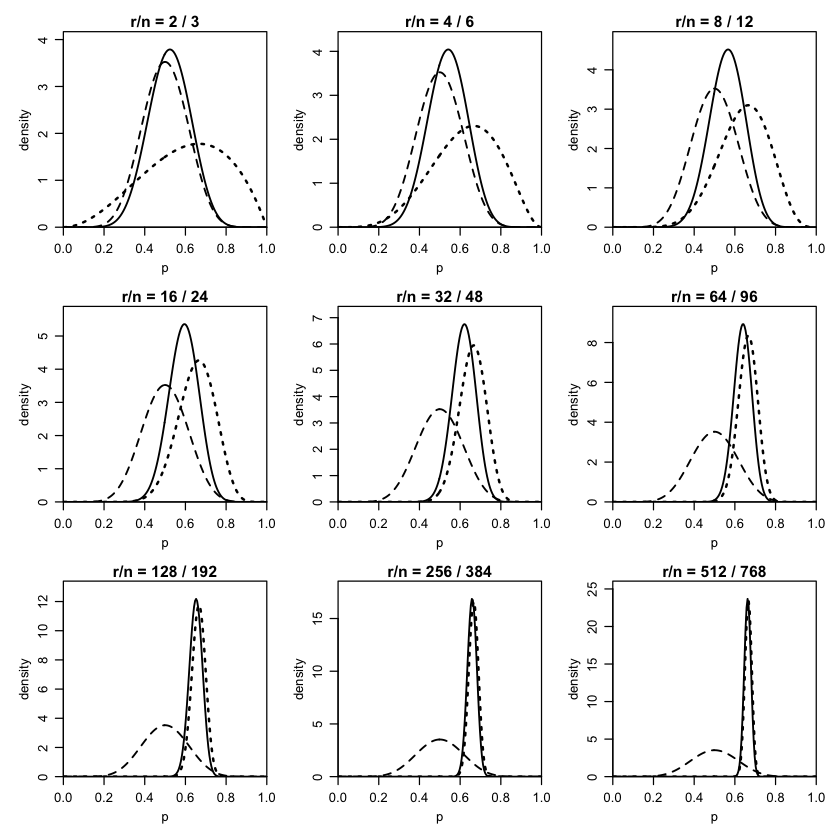

In [9]:
##### Plot prior, likelihood, and posterior PDF for coin problem with a
##### beta prior for a range of r with ratio r/n fixed

alpha.prior <- 10
beta.prior  <- 10
Nsamp <- 200 # no. of points to sample at
#pdf("coin4.pdf", 7, 7)
par(mfrow=c(3,3), mgp=c(2,0.8,0), mar=c(3.5,3.5,1.5,1), oma=0.5*c(1,1,1,1))
deltap <- 1/Nsamp # width of rectangles used for numerical integration
p <- seq(from=1/(2*Nsamp), by=1/Nsamp, length.out=Nsamp) # rectangle centres
prior <- dbeta(x=p, shape1=alpha.prior, shape2=beta.prior)
for(r in 2^(1:9)) {
  n <- (3/2)*r
  like  <- dbinom(x=r, size=n, prob=p)
  like  <- like/(deltap*sum(like)) # for plotting convenience only
  post  <- dbeta(x=p, shape1=alpha.prior+r, shape2=beta.prior+n-r)
  plot(p, prior, type="l", lwd=1.5, lty=2, xlim=c(0,1), 
       ylim=c(0,1.1*max(prior,post,like)), xaxs="i", yaxs="i", 
       xlab="p", ylab="density")
  lines(p, like, lwd=2, lty=3)
  lines(p, post, lwd=1.5)
  title(main=paste("r/n =",r,"/",n), line=0.3, cex.main=1.2)
}
#dev.off()